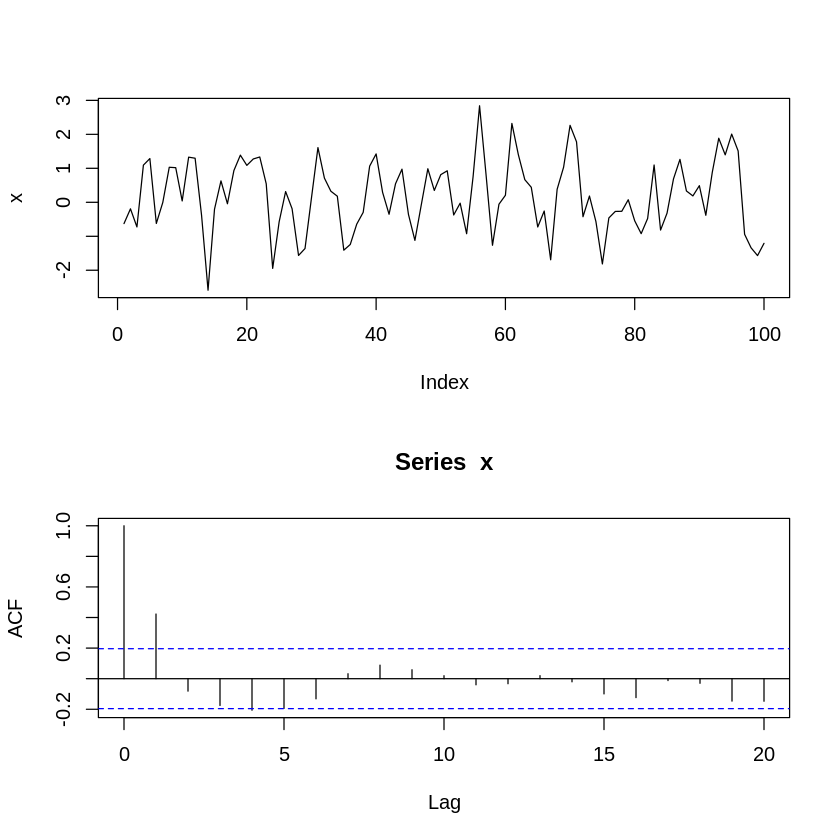

In [1]:
##https://www.quantstart.com/articles/Autoregressive-Moving-Average-ARMA-p-q-Models-for-Time-Series-Analysis-Part-2/
set.seed(1)
x <- w <- rnorm(100)
for (t in 2:100) x[t] <- w[t] + 0.6*w[t-1]
layout(1:2)
plot(x, type="l")
acf(x)

In [2]:
x.ma <- arima(x, order=c(0, 0, 1))
x.ma
sqrt(diag(vcov(x.ma))[1]) 


Call:
arima(x = x, order = c(0, 0, 1))

Coefficients:
         ma1  intercept
      0.6023     0.1681
s.e.  0.0827     0.1424

sigma^2 estimated as 0.7958:  log likelihood = -130.7,  aic = 267.39

ma1 
0.08272733

In [4]:
coef(x.ma)[1] + c(-1.96, 1.96)*sqrt(diag(vcov(x.ma))[1]) 

[1] 0.4401460 0.7644371

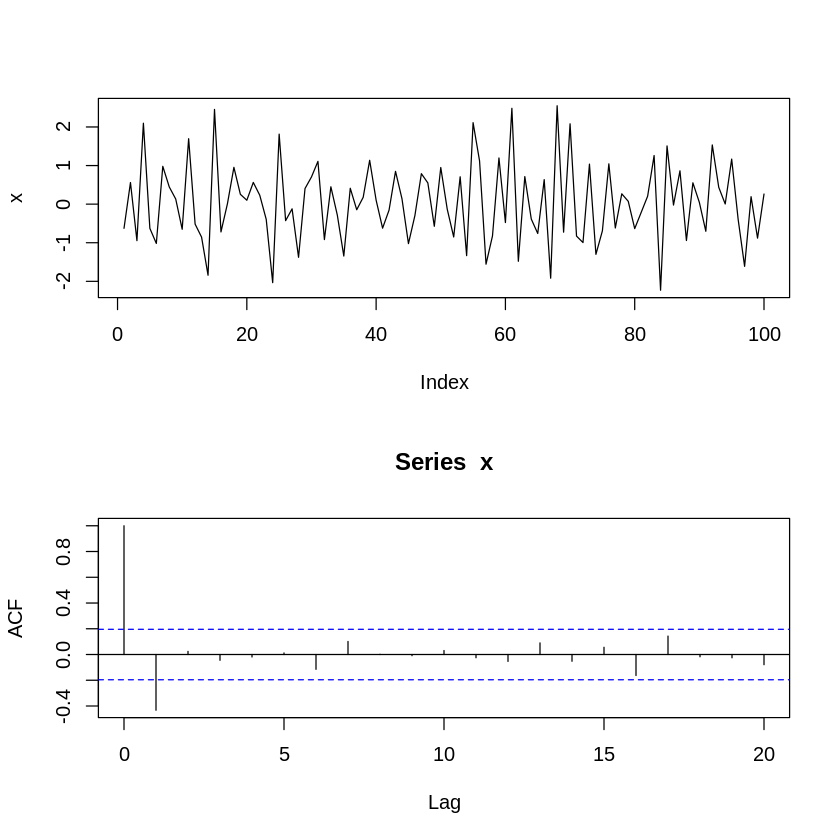

In [5]:
set.seed(1)
x <- w <- rnorm(100)
for (t in 2:100) x[t] <- w[t] - 0.6*w[t-1]
layout(1:2)
plot(x, type="l")
acf(x)

In [6]:
x.ma <- arima(x, order=c(0, 0, 1))
x.ma


Call:
arima(x = x, order = c(0, 0, 1))

Coefficients:
          ma1  intercept
      -0.7298     0.0486
s.e.   0.1008     0.0246

sigma^2 estimated as 0.7841:  log likelihood = -130.11,  aic = 266.23

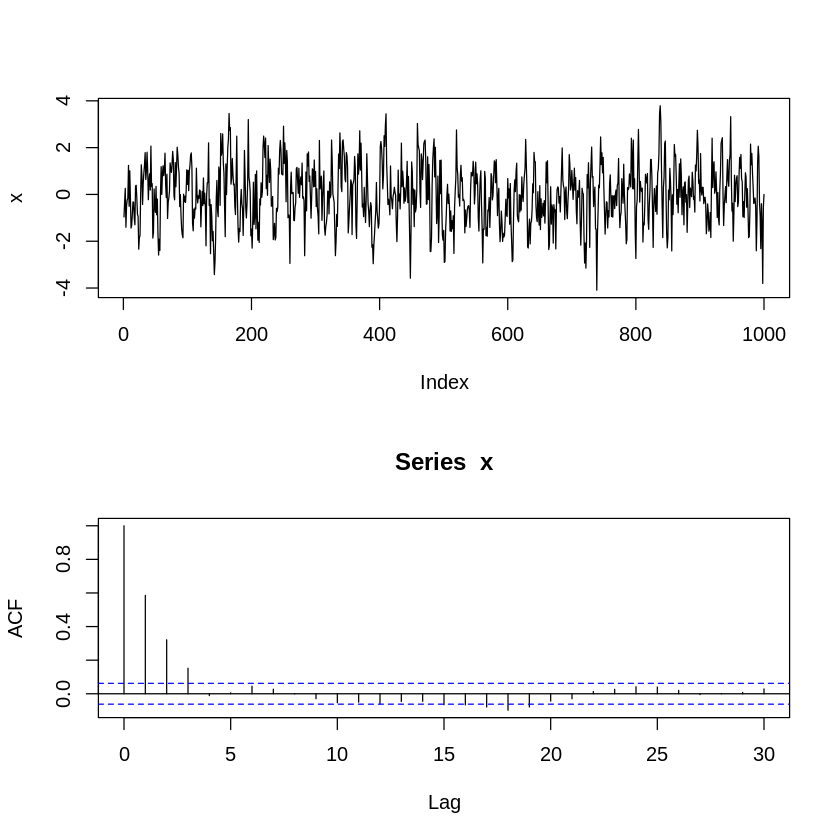

In [7]:
set.seed(3)
x <- w <- rnorm(1000)
for (t in 4:1000) x[t] <- w[t] + 0.6*w[t-1] + 0.4*w[t-2] + 0.3*w[t-3]
layout(1:2)
plot(x, type="l")
acf(x)

In [8]:
x.ma <- arima(x, order=c(0, 0, 3))
x.ma


Call:
arima(x = x, order = c(0, 0, 3))

Coefficients:
        ma1     ma2     ma3  intercept
      0.608  0.3833  0.2736     0.0146
s.e.  0.030  0.0349  0.0318     0.0714

sigma^2 estimated as 0.9951:  log likelihood = -1416.74,  aic = 2843.48

In [9]:
require(quantmod)
getSymbols("AMZN")
amznrt = diff(log(Cl(AMZN)))

Loading required package: quantmod
Loading required package: xts
Warning message:
“package ‘xts’ was built under R version 3.6.2”Loading required package: zoo
Warning message:
“package ‘zoo’ was built under R version 3.6.2”
Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
“package ‘TTR’ was built under R version 3.6.2”Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
‘getSymbols’ currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
‘loadSymbols’ to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols fo

[1] "AMZN"

In [10]:
amznrt.ma <- arima(amznrt, order=c(0, 0, 1))
amznrt.ma


Call:
arima(x = amznrt, order = c(0, 0, 1))

Coefficients:
          ma1  intercept
      -0.0216     0.0012
s.e.   0.0185     0.0004

sigma^2 estimated as 0.0005729:  log likelihood = 7627.59,  aic = -15249.17

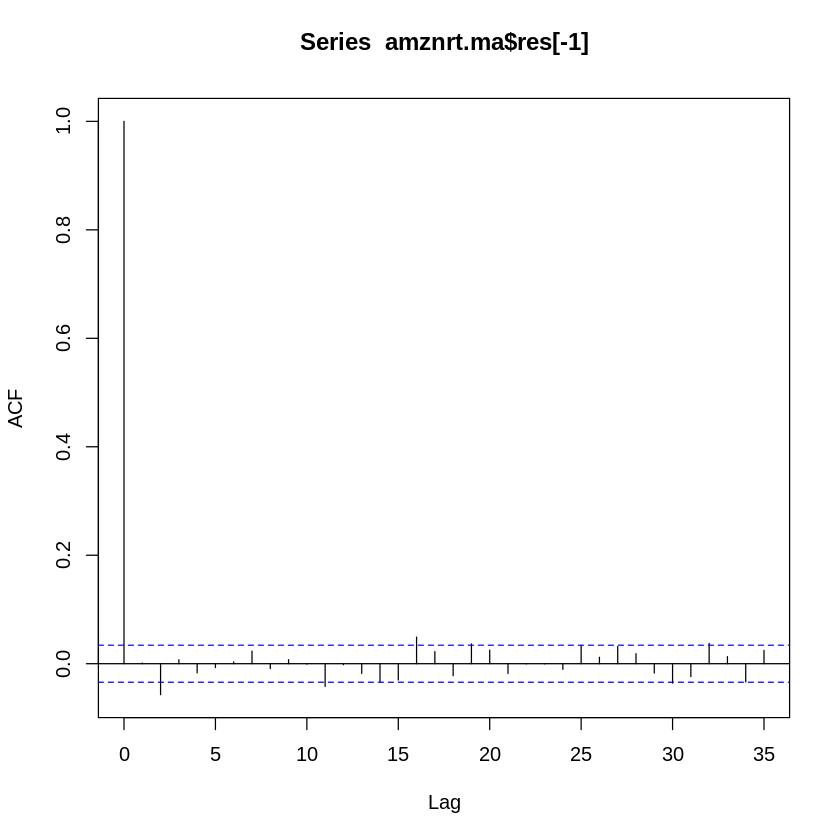

In [11]:
acf(amznrt.ma$res[-1])

In [12]:
amznrt.ma <- arima(amznrt, order=c(0, 0, 2))
amznrt.ma


Call:
arima(x = amznrt, order = c(0, 0, 2))

Coefficients:
          ma1      ma2  intercept
      -0.0194  -0.0591     0.0012
s.e.   0.0174   0.0177     0.0004

sigma^2 estimated as 0.0005709:  log likelihood = 7633.14,  aic = -15258.28

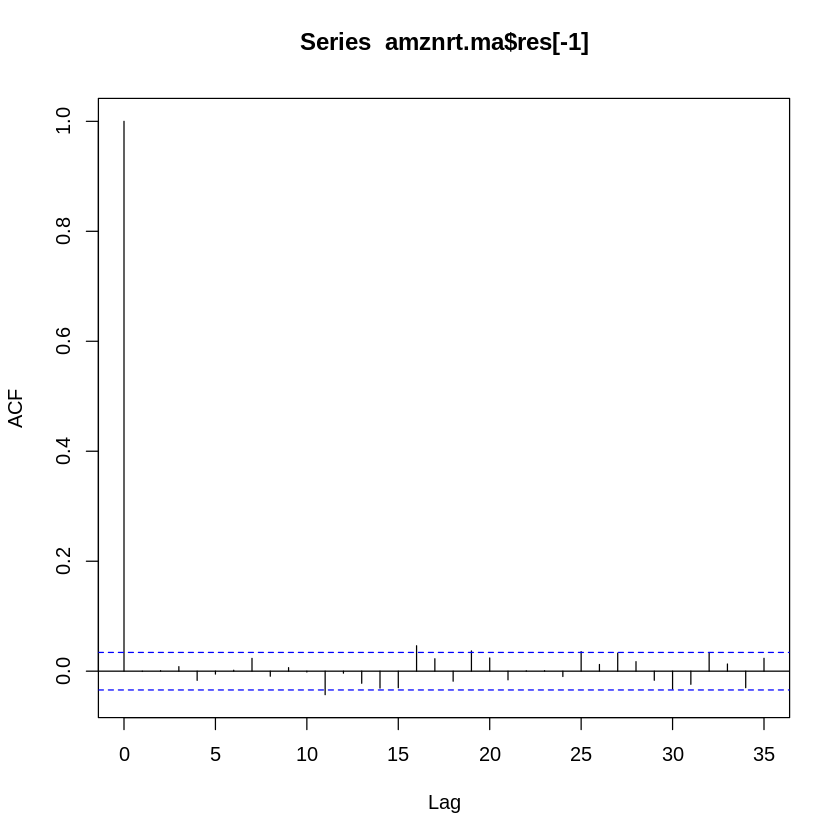

In [13]:
acf(amznrt.ma$res[-1])

In [14]:
amznrt.ma <- arima(amznrt, order=c(0, 0, 3))
amznrt.ma


Call:
arima(x = amznrt, order = c(0, 0, 3))

Coefficients:
          ma1      ma2     ma3  intercept
      -0.0196  -0.0592  0.0076     0.0012
s.e.   0.0174   0.0177  0.0174     0.0004

sigma^2 estimated as 0.0005709:  log likelihood = 7633.24,  aic = -15256.48

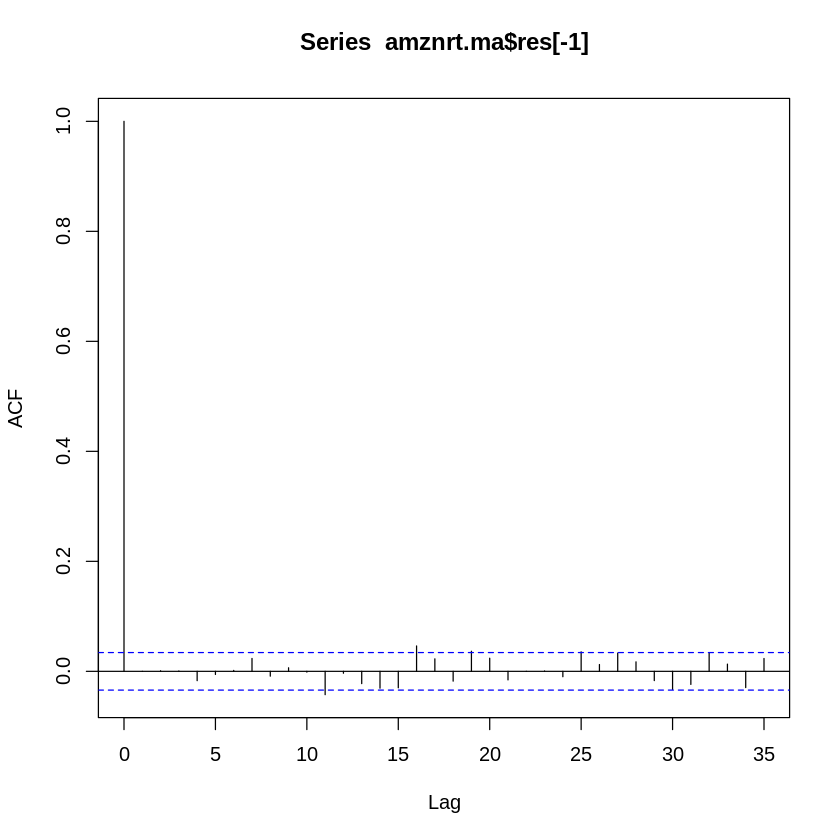

In [15]:
acf(amznrt.ma$res[-1])

In [16]:
getSymbols("^GSPC")
gspcrt = diff(log(Cl(GSPC)))
gspcrt.ma <- arima(gspcrt, order=c(0, 0, 1))
gspcrt.ma

Warning message:
“'indexClass<-' is deprecated.
Use 'tclass<-' instead.
See help("Deprecated") and help("xts-deprecated").”

[1] "^GSPC"


Call:
arima(x = gspcrt, order = c(0, 0, 1))

Coefficients:
          ma1  intercept
      -0.1090      3e-04
s.e.   0.0182      2e-04

sigma^2 estimated as 0.0001468:  log likelihood = 9872.19,  aic = -19738.38

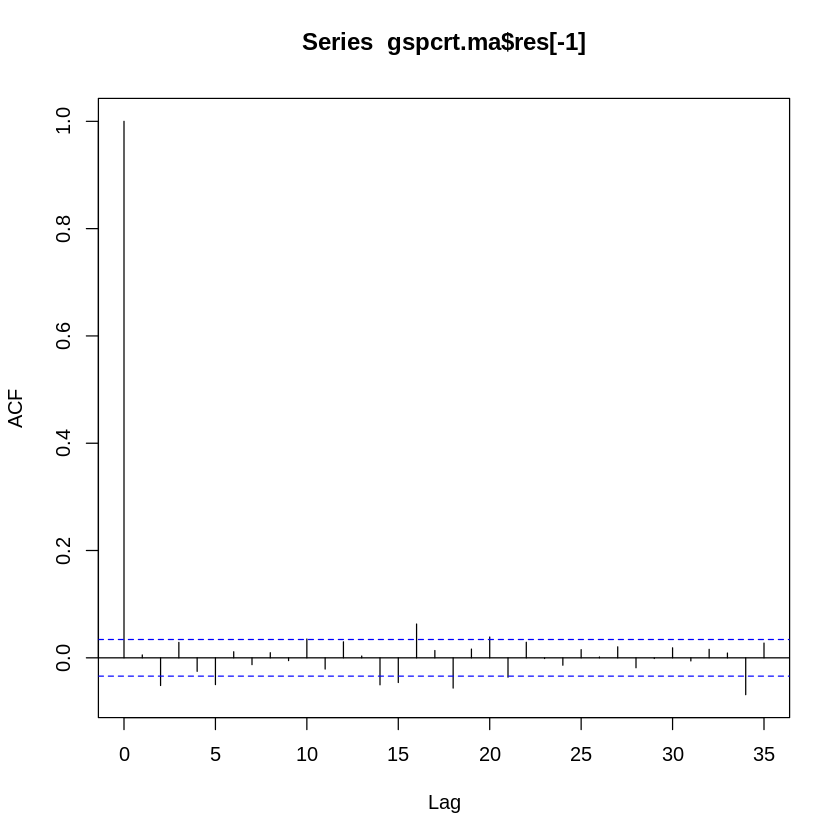

In [17]:
acf(gspcrt.ma$res[-1])

In [18]:
gspcrt.ma <- arima(gspcrt, order=c(0, 0, 2))
gspcrt.ma


Call:
arima(x = gspcrt, order = c(0, 0, 2))

Coefficients:
          ma1      ma2  intercept
      -0.1006  -0.0532      3e-04
s.e.   0.0175   0.0181      2e-04

sigma^2 estimated as 0.0001464:  log likelihood = 9876.49,  aic = -19744.97

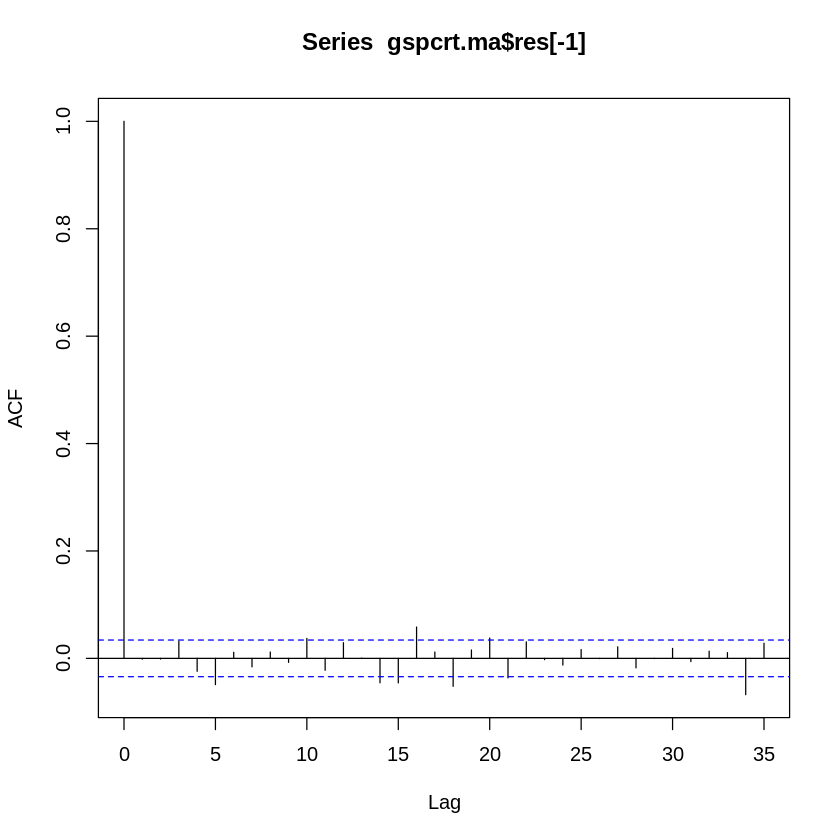

In [19]:
acf(gspcrt.ma$res[-1])


Call:
arima(x = gspcrt, order = c(0, 0, 3))

Coefficients:
          ma1      ma2     ma3  intercept
      -0.1005  -0.0534  0.0257      3e-04
s.e.   0.0174   0.0180  0.0171      2e-04

sigma^2 estimated as 0.0001463:  log likelihood = 9877.61,  aic = -19745.23

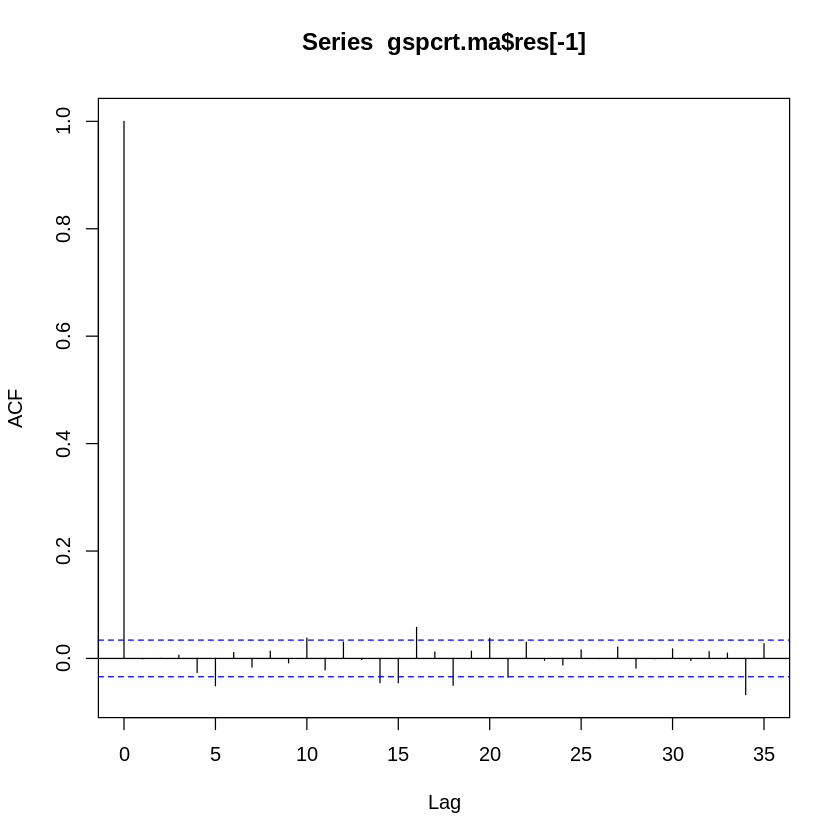

In [20]:
gspcrt.ma <- arima(gspcrt, order=c(0, 0, 3))
gspcrt.ma
acf(gspcrt.ma$res[-1])